# Reconocimiento Facial

In [1]:
from sklearn.datasets import fetch_lfw_people
import matplotlib.pyplot as plt

In [2]:
faces = fetch_lfw_people(min_faces_per_person=60)

In [3]:
print(faces.target_names)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']


In [4]:
print(faces.images.shape)

(1348, 62, 47)


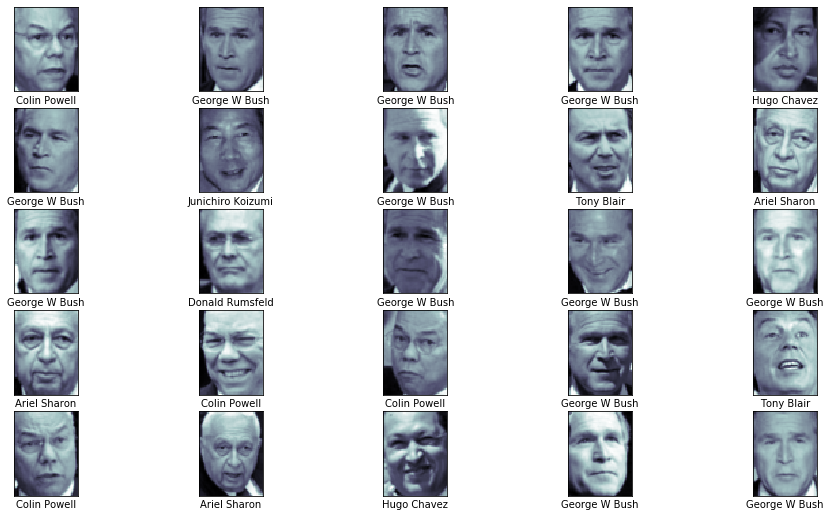

In [8]:
fig, ax = plt.subplots(5, 5, figsize=(16,9))
for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(faces.images[i], cmap="bone")
    ax_i.set(xticks=[], yticks=[], xlabel=faces.target_names[faces.target[i]])

In [11]:
print("La cantidad de datos por imagen son de:", faces.images.shape[1] * faces.images.shape[2])

La cantidad de datos por imagen son de: 2914


In [9]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [12]:
pca = PCA(n_components=150, whiten=True, random_state=42)
svc = SVC(kernel="rbf", class_weight="balanced")
model = make_pipeline(pca, svc)

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [14]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(faces.data, faces.target, random_state=42)

In [16]:
#Se crea a manera de diccionario las posibilidades de parámetros
param_grid = {
    "svc__C" : [0.1, 1, 5, 10, 50],
    "svc__gamma": [0.0001, 0.0005, 0.001, 0.005, 0.01]
}

# Se crea el Cross Validaton del modelo con los parámetros posibles
grid = GridSearchCV(model, param_grid)

## Luego se ajusta el model para los datos de entrenamiento
%time grid.fit(Xtrain, Ytrain)

C:\Users\CAMILO\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\CAMILO\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Wall time: 1min


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=150, random_state=42,
                                            svd_solver='auto', tol=0.0,
                                            whiten=True)),
                                       ('svc',
                                        SVC(C=1.0, cache_size=200,
                                            class_weight='balanced', coef0=0.0,
                                            decision_function_shape='ovr',
                                            degree=3, gamma='auto_deprecated',
                                            kernel='rbf', max_iter=-1,
                                            probability=False,
                                            random_state=None, shrinking=True,
  

In [17]:
print(grid.best_params_)

{'svc__C': 10, 'svc__gamma': 0.001}


In [18]:
classifier = grid.best_estimator_
yfit = classifier.predict(Xtest)

## Vamos a graficar las imágenes con las predicciones Comparando con el original

Text(0.5, 0.98, 'Predicciones de las imágenes (Incorrectas en Rojo)')

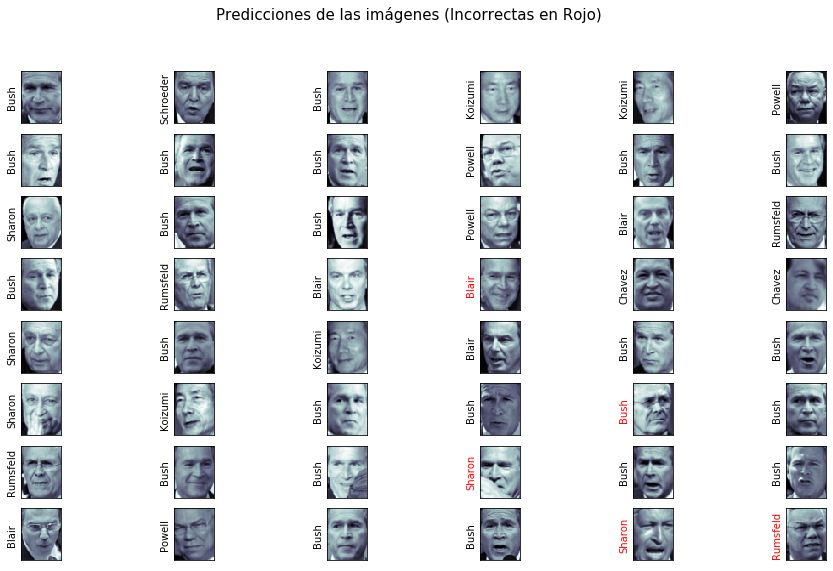

In [31]:
fig, ax = plt.subplots(8,6, figsize=(16,9))

for i, ax_i in enumerate(ax.flat):
    ax_i.imshow(Xtest[i].reshape(62, 47), cmap="bone")
    ax_i.set(xticks=[], yticks=[])  ## Es para quitar las divisiones en X y Y de la figura
    ax_i.set_ylabel(faces.target_names[yfit[i]].split()[-1],  ##El split es para dejar sólo los apellidos
                   color = "black" if yfit[i]==Ytest[i] else "red") ## Acá está lo importante de la clasificación de los nombres

fig.suptitle("Predicciones de las imágenes (Incorrectas en Rojo)", size=15)
    

In [39]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns; sns.set()

In [34]:
print(classification_report(Ytest, yfit, target_names= faces.target_names))

                   precision    recall  f1-score   support

     Ariel Sharon       0.65      0.73      0.69        15
     Colin Powell       0.80      0.87      0.83        68
  Donald Rumsfeld       0.74      0.84      0.79        31
    George W Bush       0.92      0.83      0.88       126
Gerhard Schroeder       0.86      0.83      0.84        23
      Hugo Chavez       0.93      0.70      0.80        20
Junichiro Koizumi       0.92      1.00      0.96        12
       Tony Blair       0.85      0.95      0.90        42

         accuracy                           0.85       337
        macro avg       0.83      0.84      0.84       337
     weighted avg       0.86      0.85      0.85       337



In [38]:
mat = confusion_matrix(Ytest, yfit)

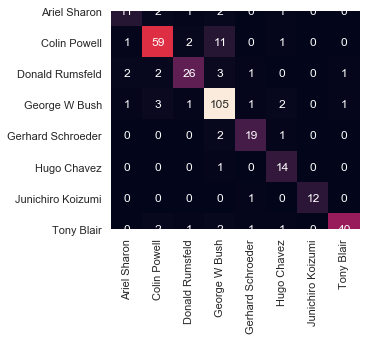

In [46]:
sns.heatmap(mat.T, square=True, annot=True, fmt="d", cbar=False, xticklabels=faces.target_names,
           yticklabels=faces.target_names)

## Ensayar OpenCV